In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

# Setup

In [2]:
model = BabyMAKROModelClass(name='baseline')

In [3]:
par = model.par
ss = model.ss
sol = model.sol

# Find steady state and Jacobian

In [4]:
model.find_ss()

In [5]:
model.calc_jac(do_print=True)

Jacobian calculated in 1.0 mins 0 secs secs


# Find IRF

In [6]:
model.set_exo_ss()

In [7]:
Tshock = 50
shock = 0.01*ss.Gamma
persistence = 0.80**np.arange(Tshock)
sol.Gamma[:Tshock] = ss.Gamma + shock*persistence

In [8]:
model.find_IRF()

initial:
   max. abs. error = 8.01e-01
    2.40e-14 in A_R_ini_error
    5.51e-14 in Aq_diff
    1.43e-03 in bargaining_cond
    4.44e-16 in FOC_capital_agency
    1.15e-14 in FOC_K_ell
    8.01e-01 in mkt_clearing
    9.90e-03 in PC

it = 0
 solve: t1-t0 = 0.1 secs
   max. abs. error = 8.01e-01
    7.13e-05 in A_R_ini_error
    2.41e-06 in Aq_diff
    1.41e-05 in bargaining_cond
    1.62e-05 in FOC_capital_agency
    6.49e-04 in FOC_K_ell
    9.29e-03 in mkt_clearing
    1.78e-04 in PC
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.1 secs
   max. abs. error = 9.29e-03
    7.10e-07 in A_R_ini_error
    5.44e-08 in Aq_diff
    2.05e-07 in bargaining_cond
    8.52e-07 in FOC_capital_agency
    1.21e-05 in FOC_K_ell
    2.19e-04 in mkt_clearing
    2.67e-06 in PC
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.1 secs
   max. abs. error = 2.19e-04
    1.30e-08 in A_R_ini_error
    4.74e-10 in Aq_diff
    2.76e-09 in b

## Figures

### Long-view

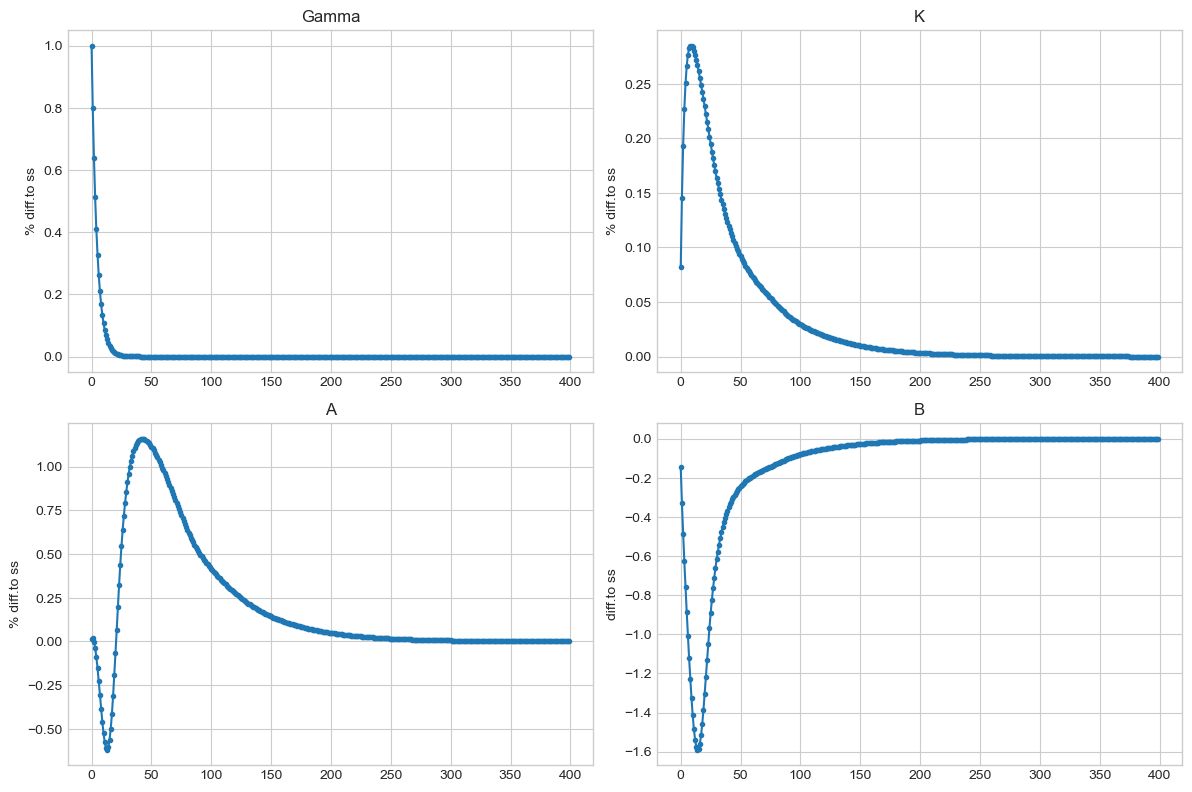

In [9]:
model.plot_IRF(varlist=['Gamma','K','A','B'],T_IRF=par.T,ncol=2)

### National accouting - quantities

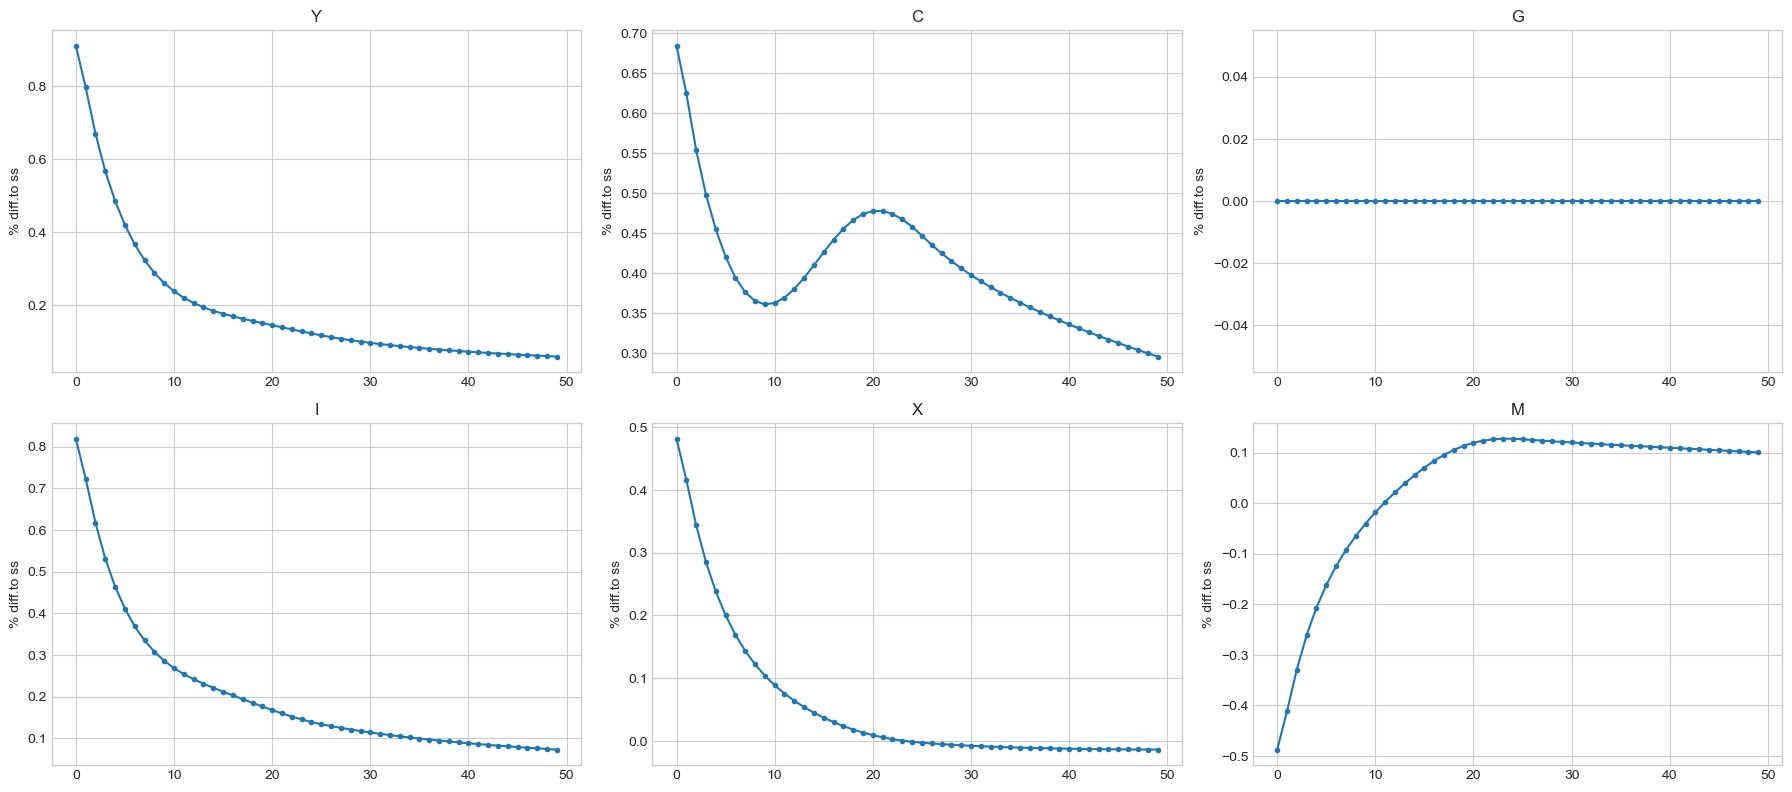

In [10]:
model.plot_IRF(varlist=['Y','C','G','I','X','M'])

### National accouting - prices

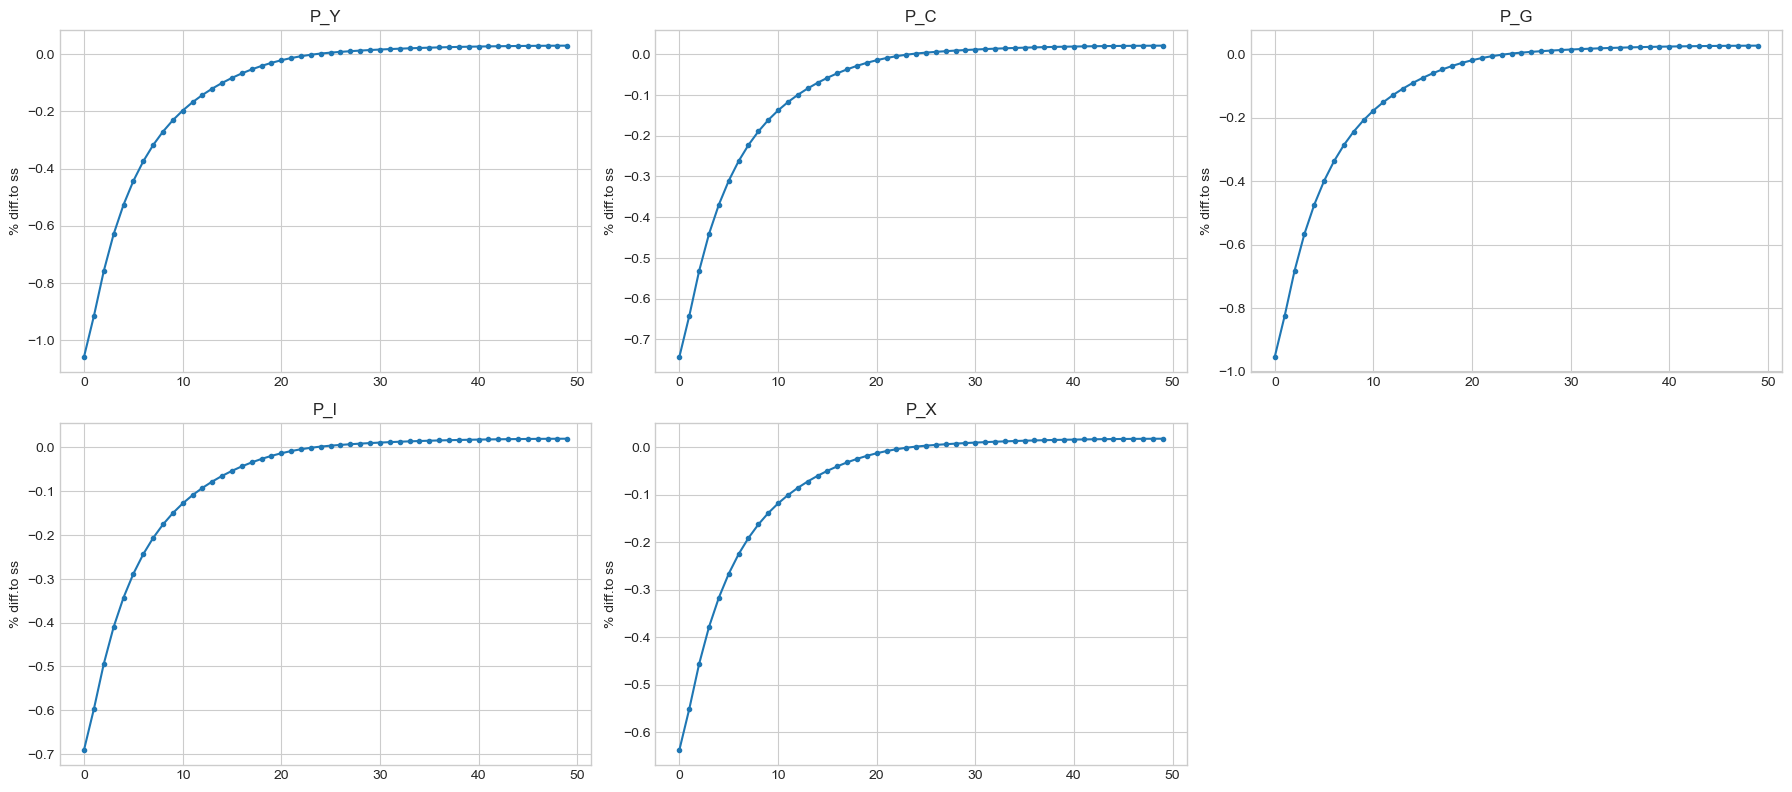

In [11]:
model.plot_IRF(varlist=['P_Y','P_C','P_G','P_I','P_X'])

### Labor market

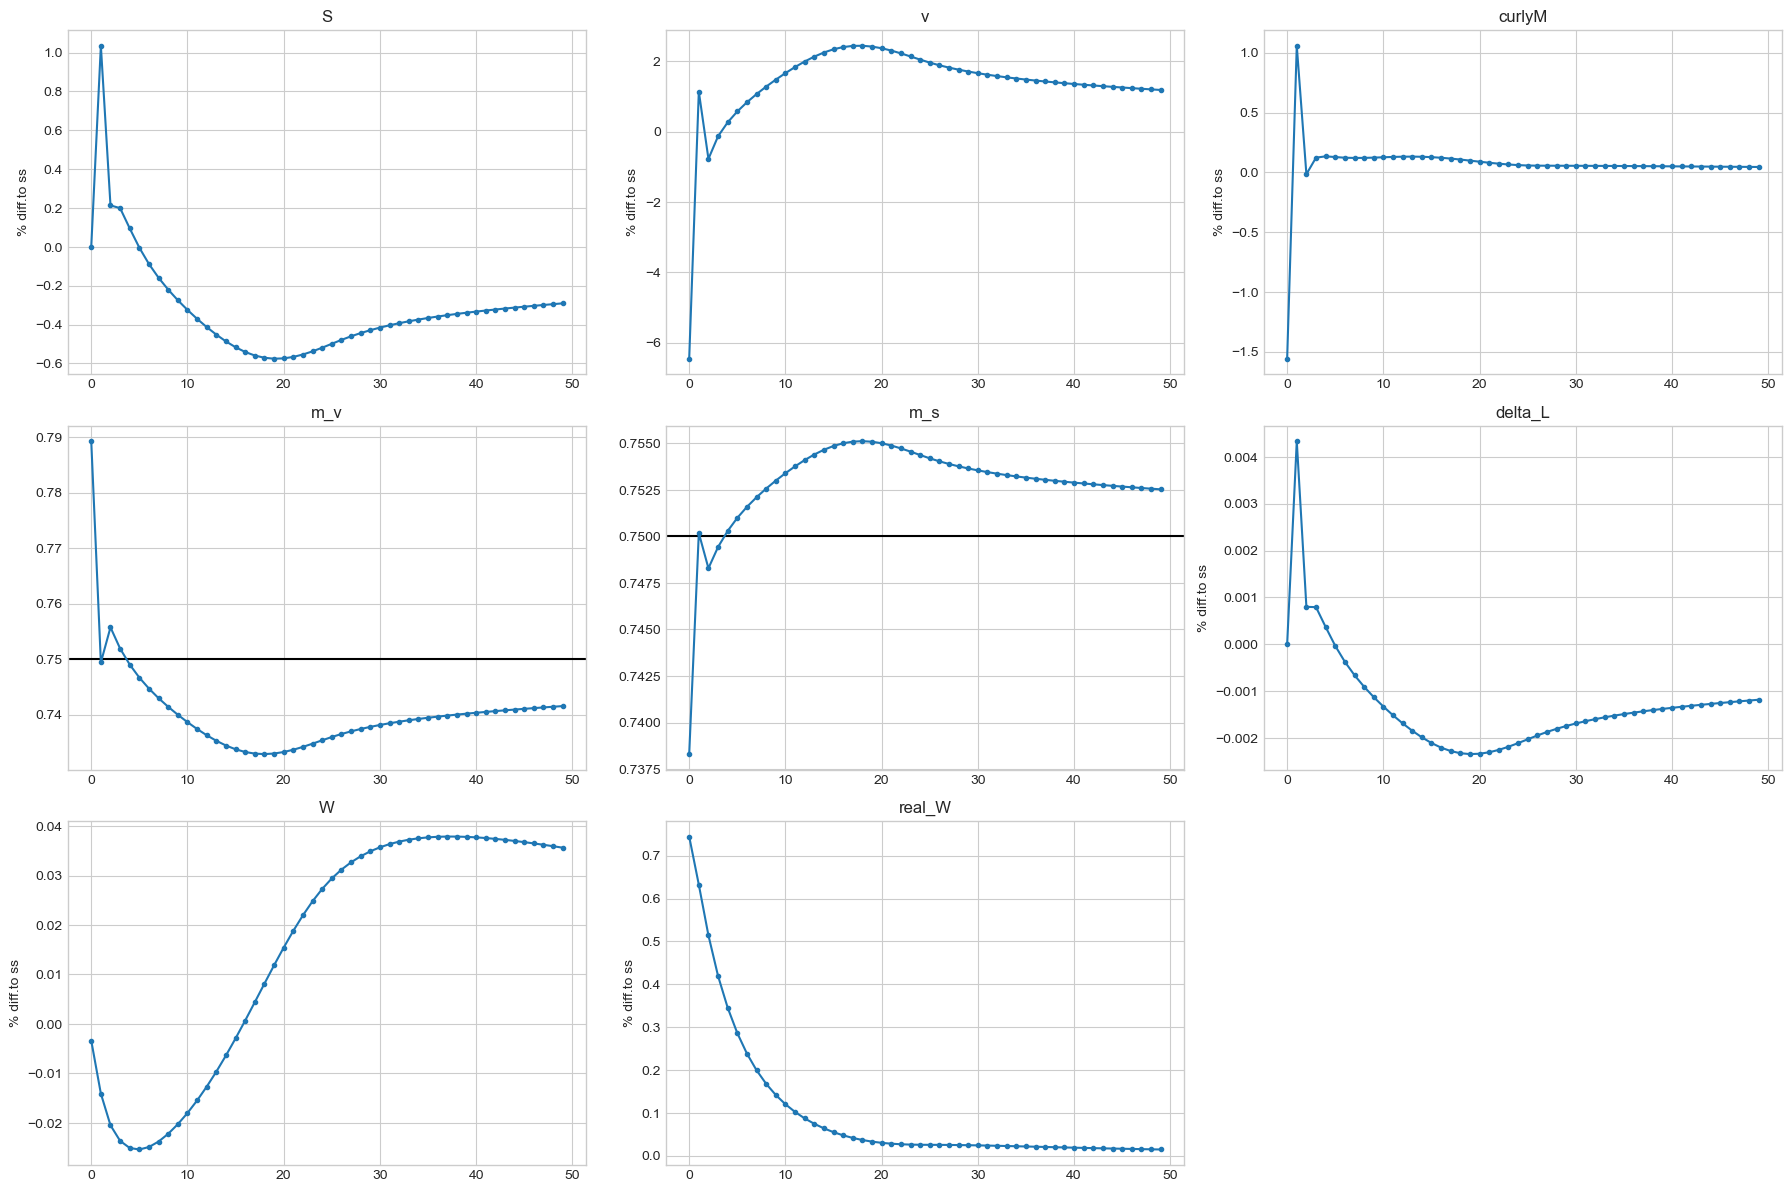

In [12]:
model.plot_IRF(varlist=['S','v','curlyM','m_v','m_s','delta_L','W','real_W'],abs=['m_v','m_s'])

### Capital accumulation

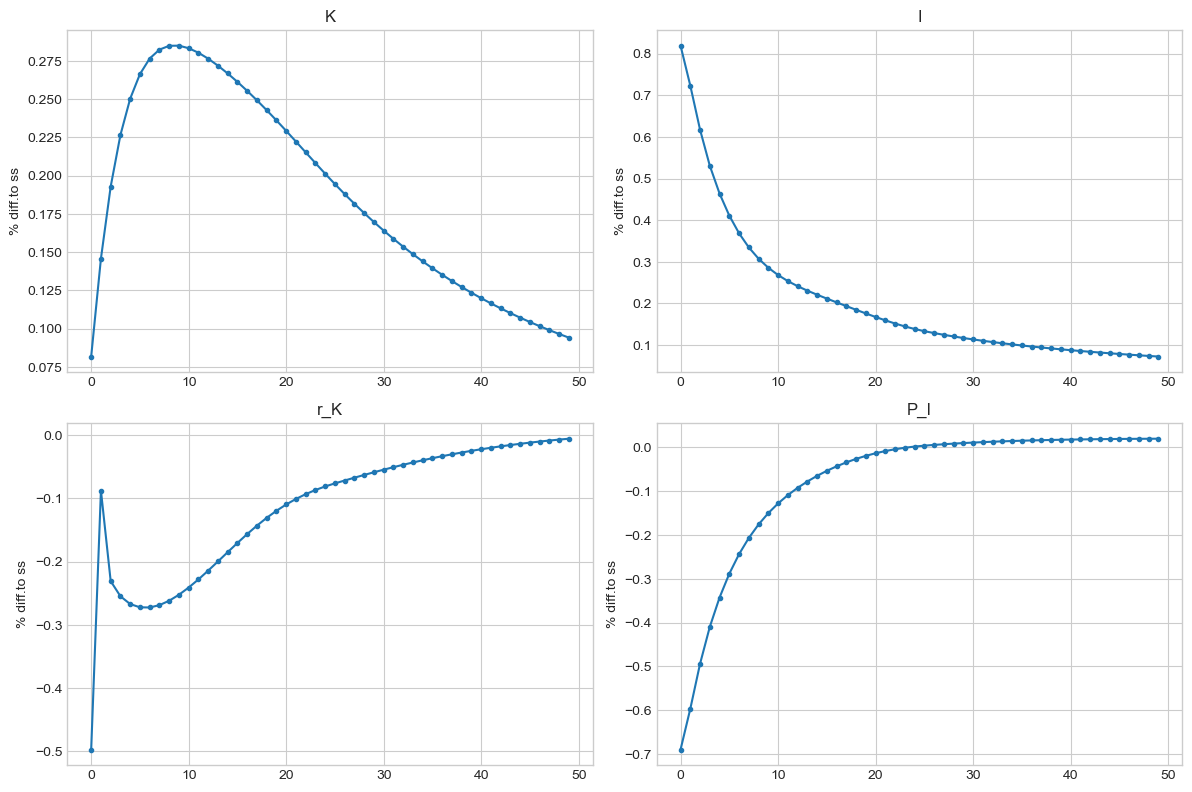

In [13]:
model.plot_IRF(varlist=['K','I','r_K','P_I'],ncol=2)

### Production firms

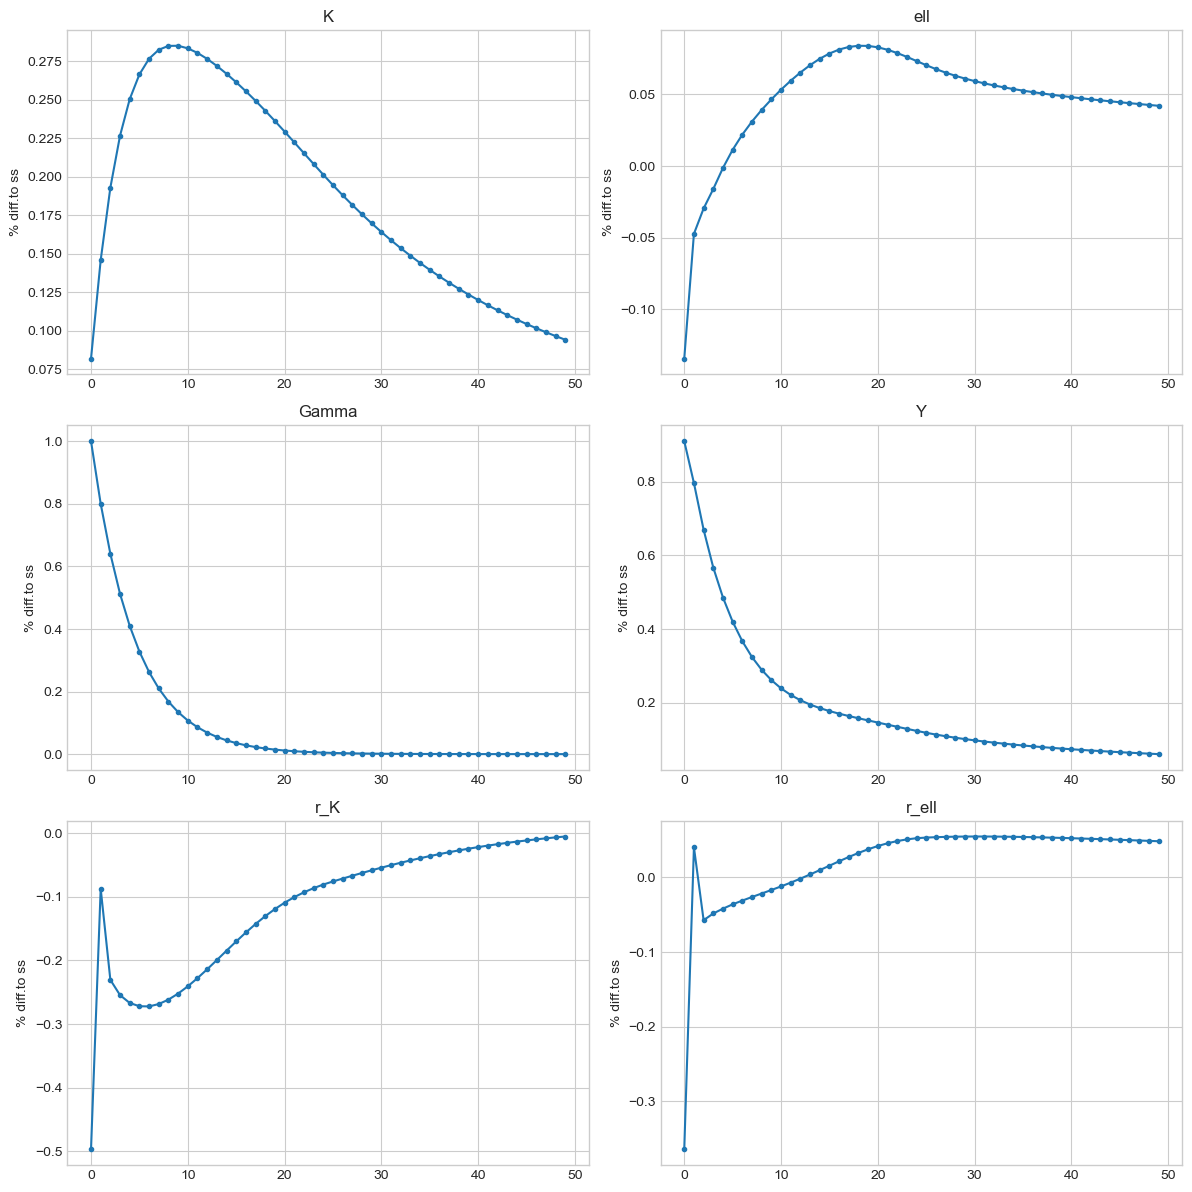

In [14]:
model.plot_IRF(varlist=['K','ell','Gamma','Y','r_K','r_ell'],ncol=2)

### Phillips curve

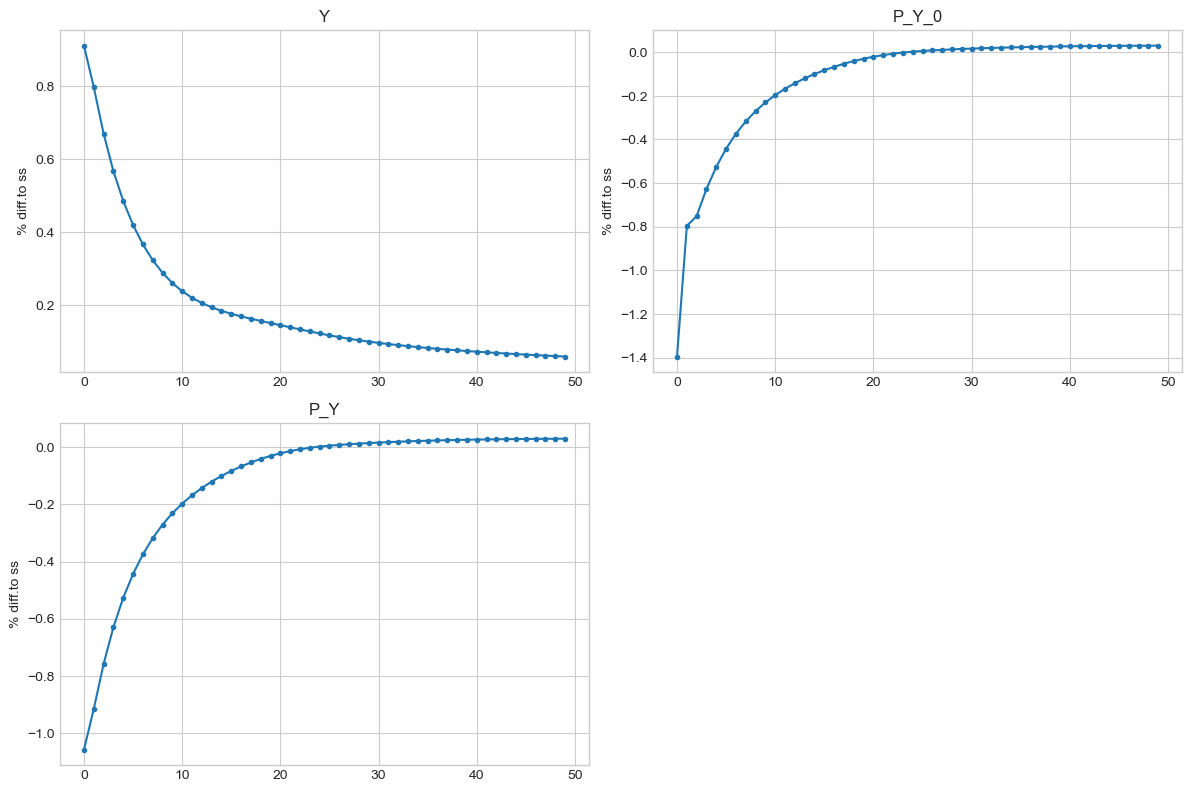

In [15]:
model.plot_IRF(varlist=['Y','P_Y_0','P_Y'],ncol=2)

### Government

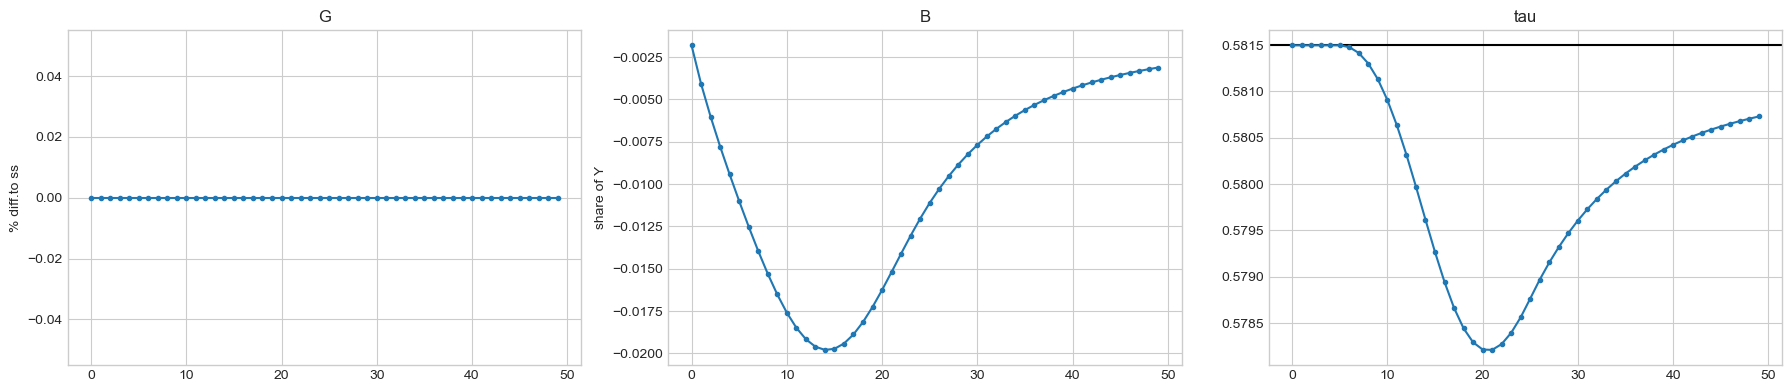

In [16]:
model.plot_IRF(varlist=['G','B','tau'],abs=['tau'],Y_share=['B'])

### Households - aggregate

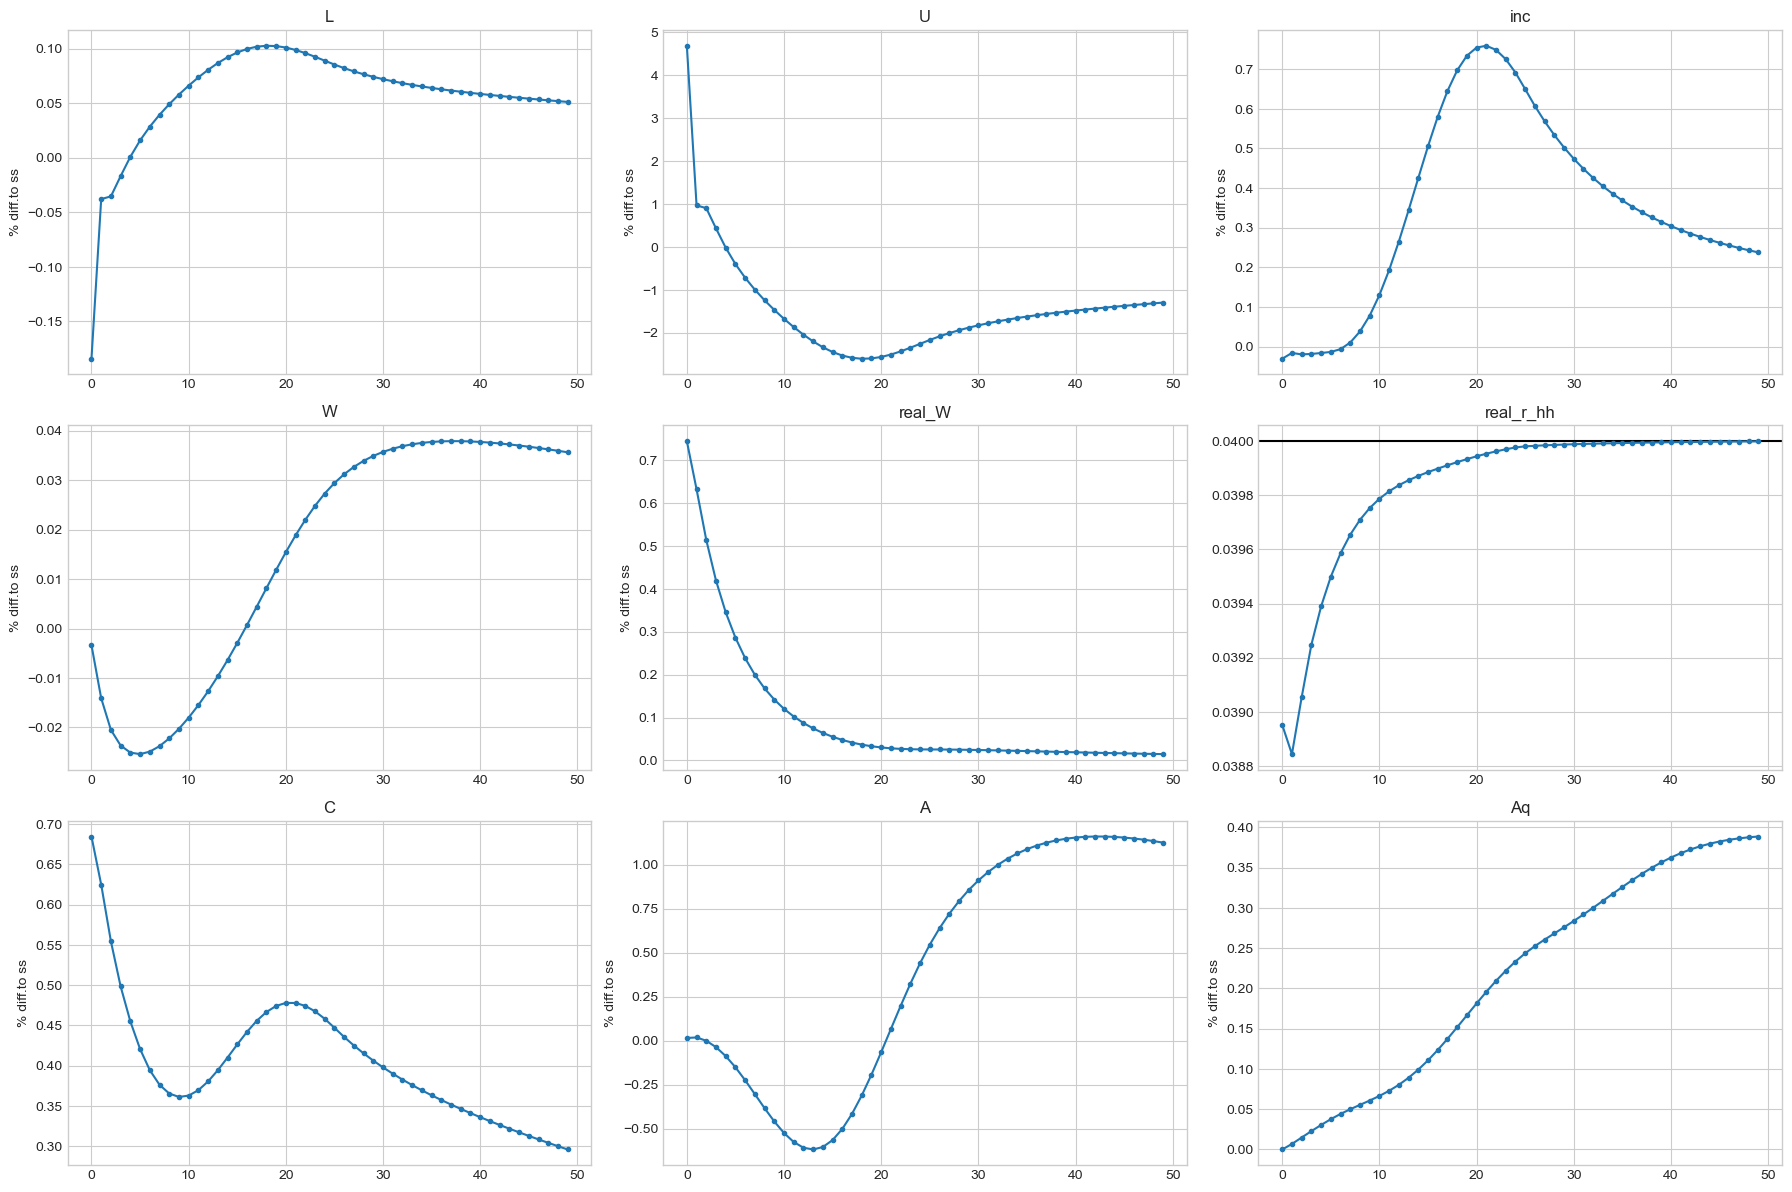

In [17]:
model.plot_IRF(varlist=['L','U','inc','W','real_W','real_r_hh','C','A','Aq'],ncol=3,abs=['real_r_hh'])

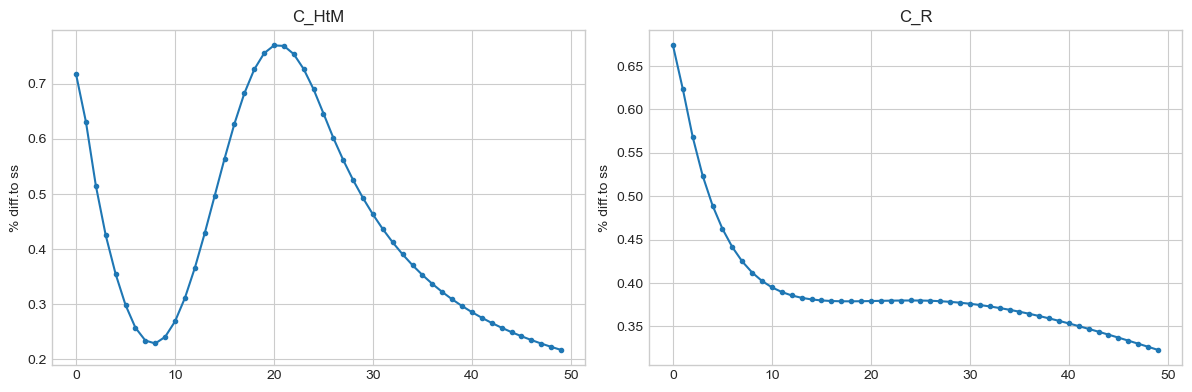

In [18]:
model.plot_IRF(varlist=['C_HtM','C_R'],ncol=2)

### Households - life-cycle

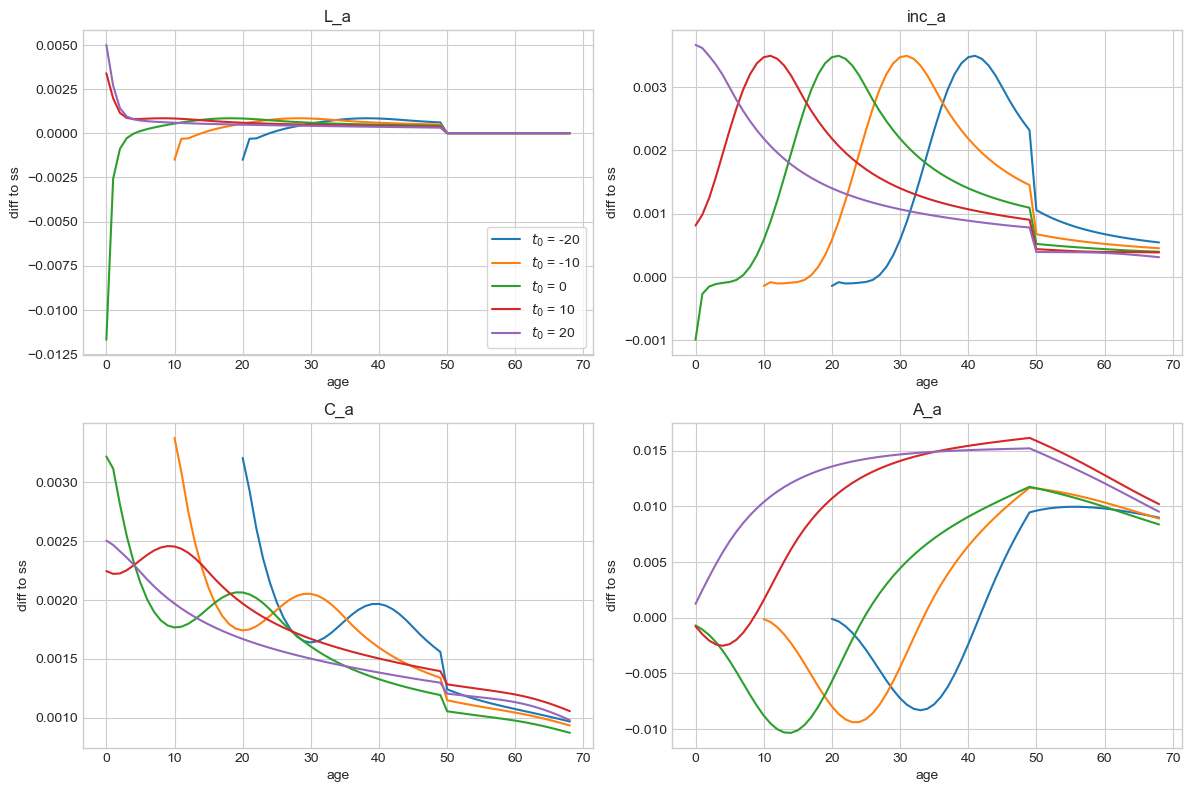

In [19]:
model.plot_IRF_hh(varlist=['L_a','inc_a','C_a','A_a'],t0_list=[-20,-10,0,10,20])